In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as mn
from skimpy import skim
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from summarytools import dfSummary
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\bill_authentication.csv")
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


EDA

In [3]:
df.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [4]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

outlier

In [5]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Variance[float64],Mean (sd) : 0.4 (2.8)min < med < max:-7.0 < 0.5 < 6.8IQR (CV) : 4.6 (0.2),"1,338 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy80BEi2AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACu0lEQVR4nO3cQY7aQBCF4ddhQAYkWwgJdlwgUhYsOUQOmyNkwQm4ATskhEAwgwDjbKJoiCZgu3HG1f6/fQ9ePLlcmq5yWZYJqLsvn/0AQB4vn/0AIXLOdSV1Sh4/ZVn29sznCQFBfTLnXHc4HH6P43hQ5vxut9s4534Q1lsE9fk6cRwPZrPZW5IkxyIHt9ttNJ/PB+v1uiOJoL4TbFA9y6/kWYKTJDmORqPXEke7ZX8zZEEG1bf8SpTgugkyqPIov5LtEhxqIxdqUCV5lV/JYAkOuZELOqgNFGwjR1ADFGIjR1D/IU3TtqTYOVf0aHy9XtsVPFKjEdQPHA6H9vl8/jaZTFqtVqtQCT2fz1Gapl+Px+NPSWW/j/EXgvqB0+n0EkVRbzqdHsfj8abI2eVyOVgsFr3L5dKq6vmaiKDe0e/3C3/rbTab2n7nWcbtKZjAG7VmPJo4KeBGjqDWiE8TJ4XdyBHUGvFp4qSwGzmCWkNlmjgp7EaOZgomEFSYQFBhAkGFCQQVJhBUmEBQYQJBhQkEFSYQVJhAUGEC/+vHH55XDKUK9wIQVEjyv2IoVbsXgKBCkv8Vw6r3AhBU3Ch7xfC3yq4Z0kzBBIIKE2pd+j020wU75NZUtQ2qz2a6kIfcmqq2QZXHZrqQh9yaqs5BlVRuM13IQ25NRTMFEwgqTCCoMIGgwgSCChMIKkwgqDCBoMIEggoTCCpMIKgwgaDCBIIKEwgqTCCoMIGgwoRKL057zDxJzD3hncqC6jPzJDH3hFtVvlFLzzxJzD3hVuUzU2VmniTmnnCLZgomEFSY8LD0s60EeXnuV727W/VuUNlWgrx896s+2q366I3KthLk4rNfNc9u1VxdP9tKkJfHftW7eaGZggkEFSbkKv3b7TYq+of3+30kSYfDIVqtVr3/ed7qb1t9bt/zefL1C4+xsu2zDA53AAAAAElFTkSuQmCC"">",0(0.0%)
2,Skewness[float64],Mean (sd) : 1.9 (5.9)min < med < max:-13.8 < 2.3 < 13.0IQR (CV) : 8.5 (0.3),"1,256 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy80BEi2AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACu0lEQVR4nO3dTYriQBiA4a/Gto0/RETQnRcYmIXLHGIOO0fohSfwBu4EkYjpDsaYWXVjw6CmKhnrK95nX3YWLx3rD01VVQL47sezHwB4xMuzHyBExpi+iLxaDj9VVfXR5POEgFAbZozpT6fT33EcT2zGHw6HvTHmD7F+R6jNe43jeJIkycd4PM7rDEzTNFqtVpPdbvcqIoR6hVBbMh6P89ls9m4xtN/4wwSAyRRUIFSowKvfM2VZdkUkNsbYfkSQqwaE6pEsy7pFUfxaLBadTqdTayL2KdRVA0L1yOl0eomiaLBcLvP5fL6vOz7kVQNC9dBwOLRdMRAJdNWAyRRUIFSoQKhQgVChAqFCBUKFCixP4YvjOVqRFnfFCBUi4n6OVqTdXTFCxSfrc7Qi7e+KESq+cThHK9LirhiTKahAqFCBUKECoUIFQoUKhAoVCBUqsI4aGIfLgfHlcum28EiNINSAuFwOLIoiKsvyZ57nbyJiu+DfGkINiMvlwM1mM1mv14Pz+dxp6/lcEGqAbC4H7vd7ry8FMpmCCoQKFQgVKhAqVCBUqBDsrN/n+z+oL8hQfb//g/qCDFU8v/+D+kINVUTc7v+UZRlLgHvmWgUdqq2Q98y1ItR/CHnPXCuvQ3WYuTfy+g1xz1wrb0N1mbnz+g2Pt6GKw8yd1294fA5VROxm7rx+w8MWKlQgVKhAqFDB+++o0MPx5zFvHgIiVDTC9ecx7x0CIlQ0wmU375FDQISKRjn8PObNJUUmU1CBUKECoUIFQoUKhAoVWp31O94E5UoHvrQWqutNUM6U4trdUF1O2Y9Go1mSJAebm6CcKcW1m6E2ccq+1+u92SwAc6YU1+79R+WUPbzw0HdUTtnj2VieggqEChUIFSo89B01TdOo7gcfj8dIRCTLsmi73Q7+53itf1vrc7uOf6Svv6ePqvrfOJs4AAAAAElFTkSuQmCC"">",0(0.0%)
3,Curtosis[float64],Mean (sd) : 1.4 (4.3)min < med < max:-5.3 < 0.6 < 17.9IQR (CV) : 4.8 (0.3),"1,270 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy80BEi2AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACr0lEQVR4nO3dP47aQBSA8Tdh2RgQtgAJOg7ASikoOUDKHDZHSMEBWG5Ag5AQMoGAMIZUSROWP+NxmDf6fv0sLj4Z8PBmzfl8FsB3n559AcA9Xp59AdcYY2oi8mq5/HA+n3curwfP422oxphap9P5Fsdxy2b9er1eGWO+E2sYvA1VRF7jOG6NRqNdkiT7RxamaRqNx+PWcrl8FRFCDYDPoYqISJIk+263+8tiac35xeBp+DIFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUKHVmquC4c3w6naourwd6lRZq0XHnLMuiPM/f9vv9DxGxGe5DQMq8o1qPO4uIzGaz1nQ6rR+Px0oZFwddSh+Xth13Xq1WjDvjL75MQQVChQren5RiK8/zqojExhjbP8Ehax4JMtTtdlvNsuxLv9+vVCqVh7/IiXDImm+CDPVwOLxEUVQfDof7Xq+3enQ9h6z5J8hQ/2g0GrYHrIlwyJpXboZaYHeJnSU4czXUIrtL7CzBpVt3VOvdJXaW4NJdn1FtdpfYWYJLPPCHCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChWC/plfEQUnBJgOcIxQLyg6IcB0gHuEekGRCQGmA8pBqFcUmBDgl2OO8WUKKhAqVOCtvwQ8MXCPUB3jiUE5CNUxnhiUg1BLwhMDtwjVM5yZdRmheoQzsz5GqB7hzKyPEaqHODPrXzzwhwqEChV46w9MqLtihBqQkHfFCDUgz94VK/ifGq/ezQk1QLZPDfI8j8X+Y0PUbre/JknSsFl8625+V6hpmkaPvvBms4lERLbbbbRYLOr/c73W137mdc/n82aRjw1ZlkUi8jYYDN6bzebPR9budrvPk8nk6t38N6c3kc6kXYhaAAAAAElFTkSuQmCC"">",0(0.0%)
4,Entropy[float64],Mean (sd) : -1.2 (2.1)min < med < max:-8.5 <

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1367    False
1368    False
1369    False
1370    False
1371    False
Length: 1372, dtype: bool

In [7]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1372   │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50      ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Variance      │   0 │     0 │  0.4337 │   2.843 │  -7.042 │  -1.773 │   0.4962 │   2.821 │  6.825 │ ▁▅▇▇▇▂ │  │
│ │ Skewness      │   0 │     0 │   1.922 │   5.869 │  -13.77 │  -1.708 │     2.32 │   6.815 │  12.95 │ ▁▂▃▇▅▃ │  │
│ │ Curtosis      │   0 │     0 │   1.398 │    4.31 │  -5.286 │  -1.575 │   0.6166 │   3.179 │  17.93 │ ▅▇▃▂▁  │  │
│ │ Entropy       │   0 │     0 │  -1.192 │   2.101 │  -8.548 │  -2.413 │  -0.5867 │  0.3948 │   2.45 │  ▁▂▃▇▃ │  │
│ │ Class         │   0 │     0 │  0.4446 │  0.4971 │       0 │       0 │        0 │       1 │      1 │ ▇    ▆ │  │
│ └───────────────┴─────┴───────┴─────────┴─────────┴─────────┴─────────┴──────────┴─────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


<Axes: >

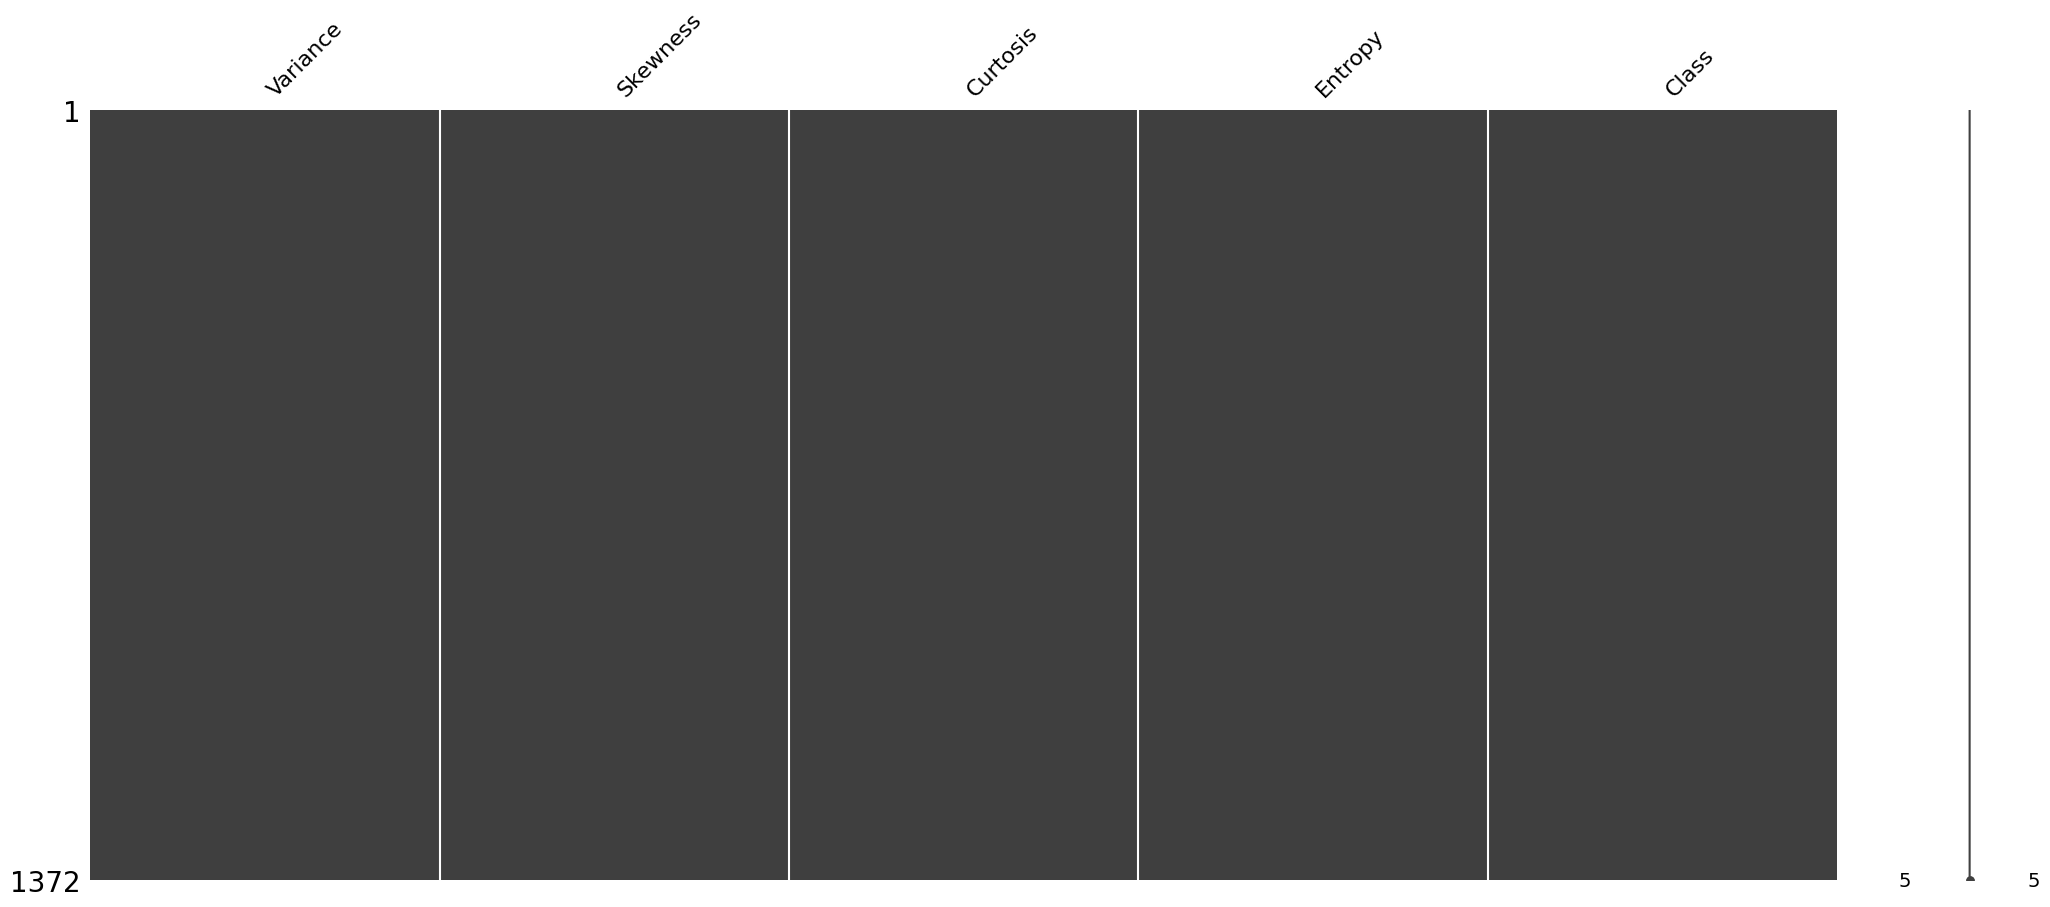

In [9]:
mn.matrix(df)

In [10]:
df_temp=df.copy()

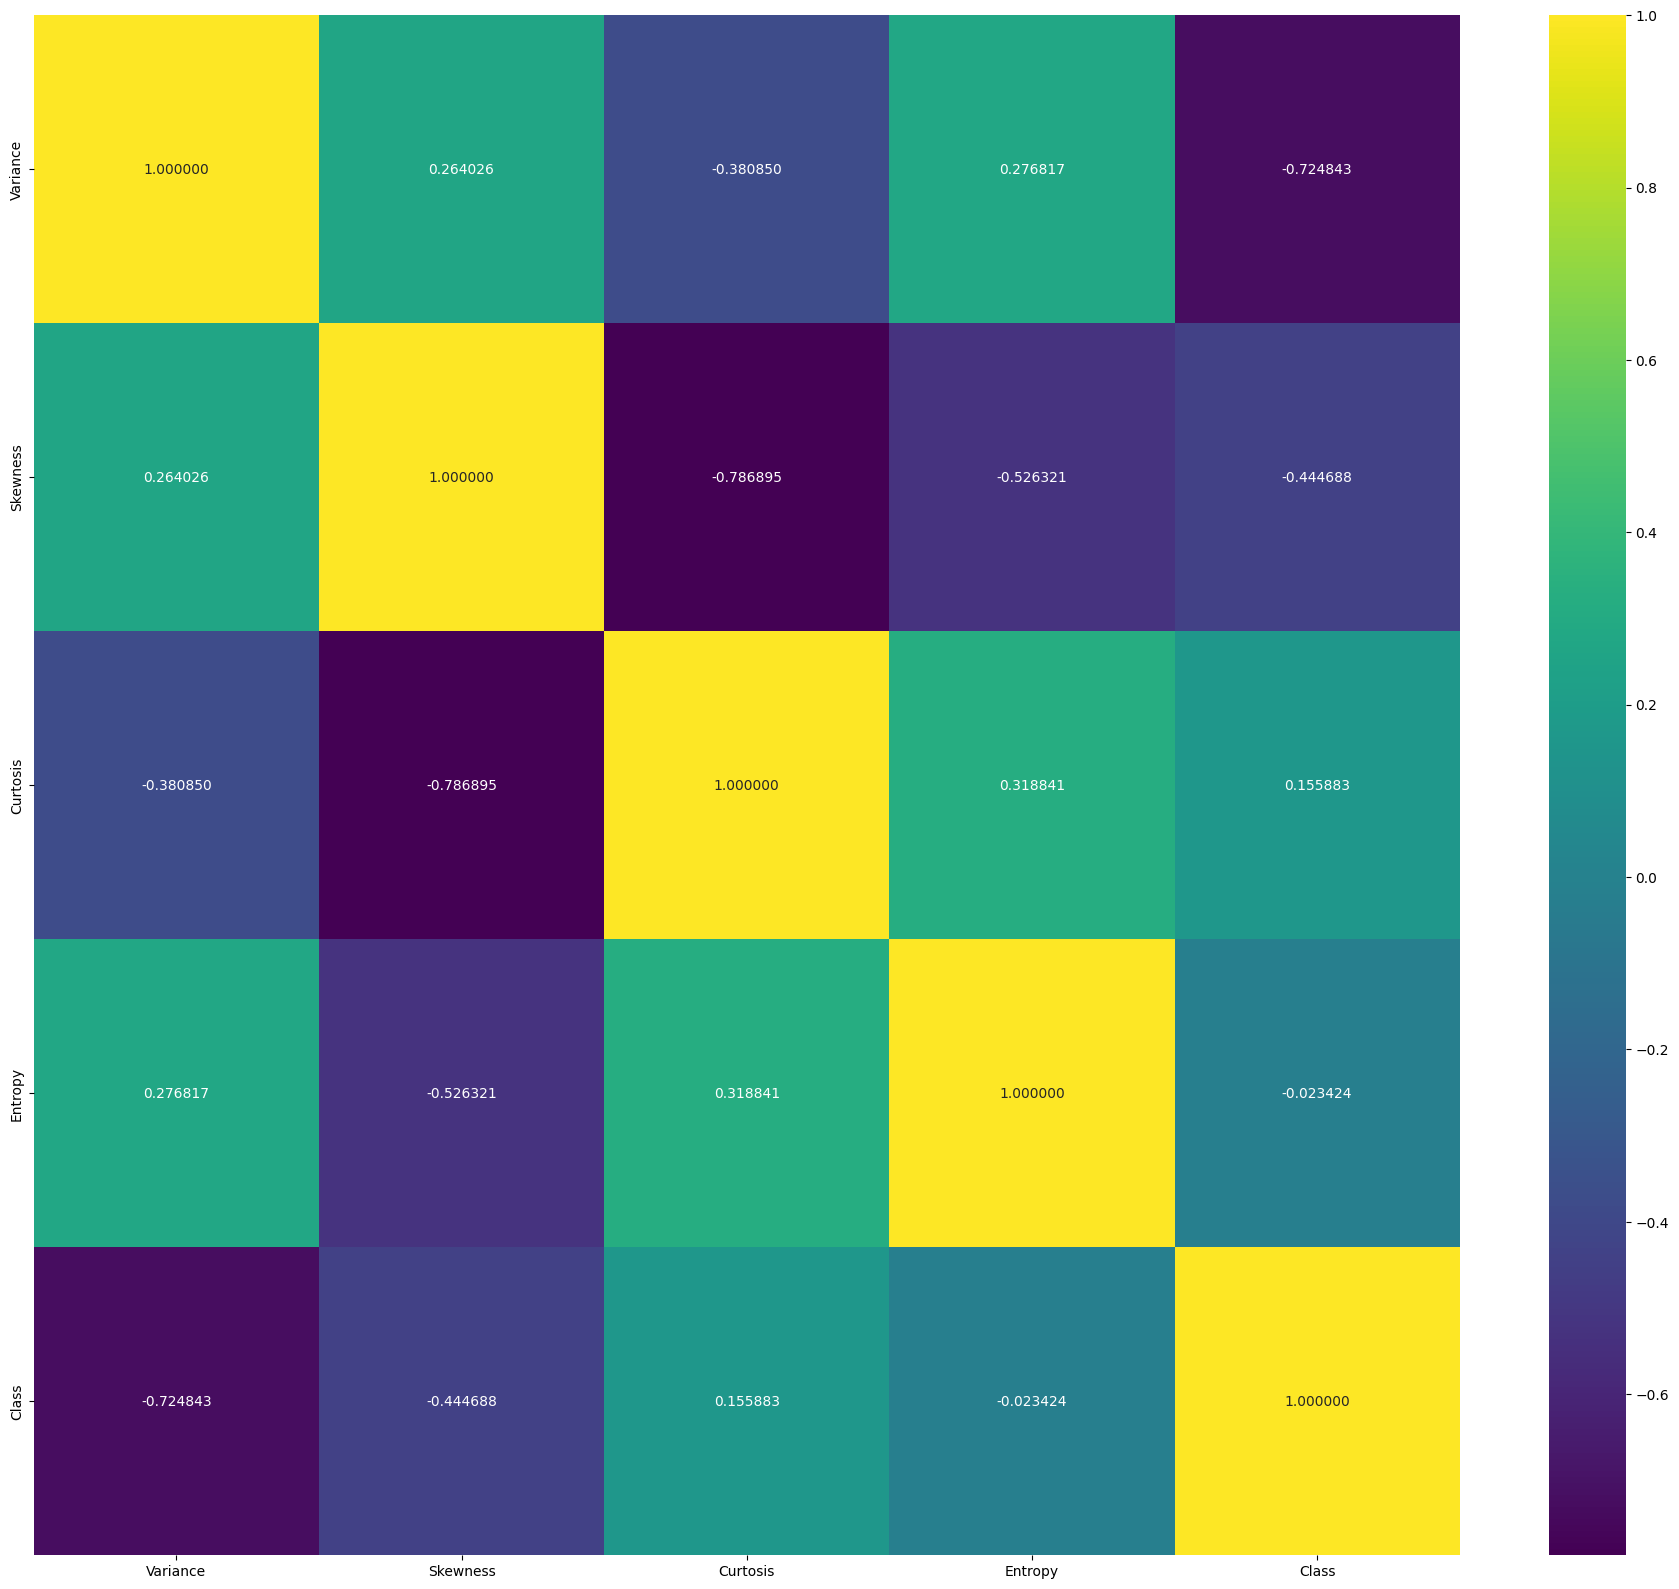

In [11]:
plt.figure(figsize=(23,20))
sns.heatmap(data=df_temp.corr(), cmap='viridis',annot=True ,fmt='2f')
plt.show()

In [12]:
features=df.columns.tolist()

In [13]:
target= "class"

In [14]:
features_to_remove=[target]

In [15]:
for feature in features_to_remove:
     if feature in features:
         features.remove(feature)
print(features)

['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']


In [16]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [17]:
print(df.columns)

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')


In [18]:
if target in df.columns:
    X = df[features]
    y = df[target]
    print(X)
    print(y)
else:
    print(f"Column '{target}' does not exist in the DataFrame.")

Column 'class' does not exist in the DataFrame.


In [25]:
X = df.drop(['Class'],axis=1)
y = df[['Class']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 720)

In [21]:
print(f"The shape of train data is for features, {X_train.shape} and target variable is {y_train.shape}")
print(f"The shape of test data is for features, {X_test.shape} and target variable is {y_test.shape}")

The shape of train data is for features, (1097, 4) and target variable is (1097, 1)
The shape of test data is for features, (275, 4) and target variable is (275, 1)


In [22]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
print("The model is giving accuarcy of :",model.score(X_test,y_test))


The model is giving accuarcy of : 0.9927272727272727


In [30]:
y_preds = model.predict(X_test)

In [31]:
print("The model is giving average accuarcy in 5 fold :", cross_val_score(model,X,y).mean())

The model is giving average accuarcy in 5 fold : 0.9803238221632384
